In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression as LR
from sklearn.datasets import load_diabetes as ld

In [222]:
X,y = ld(return_X_y=True, as_frame=True)
t = ld().target
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
corr_matrix = X.corr()
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


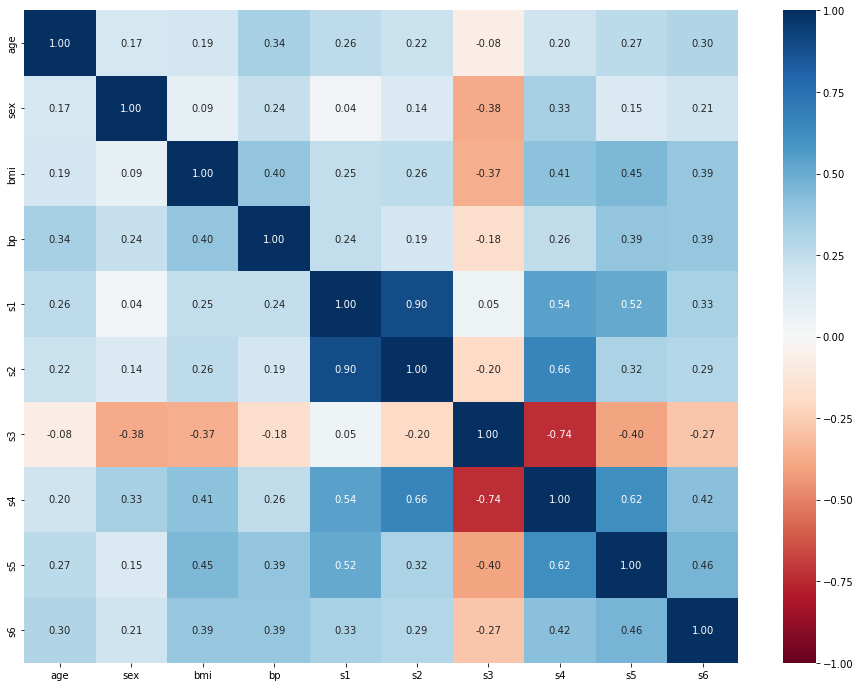

In [9]:
plt.figure(figsize = (16,12))
sns.heatmap(corr_matrix,
            vmax = 1, 
            vmin = -1,
           cmap = 'RdBu',
           annot=True, 
           fmt = '0.2f') 
plt.show()

In [27]:
t_df = pd.DataFrame(t)
t_df.columns = ['target']
t_df.describe()

,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [54]:
X['target'] = t_df
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [74]:
corr_target = X.corr()
sort = corr_target.sort_values(by='target', ascending = False)
sort

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
target,0.187889,0.043062,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062


In [77]:
r = sort['target'][1]
r

0.5864501344746885

In [80]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [79]:
X_arr = np.array(X)
X_arr

array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02, ...,
         1.99074862e-02, -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02, ...,
        -6.83315471e-02, -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02, ...,
         2.86130929e-03, -2.59303390e-02,  1.41000000e+02],
       ...,
       [ 4.17084449e-02,  5.06801187e-02, -1.59062628e-02, ...,
        -4.68825342e-02,  1.54907302e-02,  1.32000000e+02],
       [-4.54724779e-02, -4.46416365e-02,  3.90621530e-02, ...,
         4.45287288e-02, -2.59303390e-02,  2.20000000e+02],
       [-4.54724779e-02, -4.46416365e-02, -7.30303027e-02, ...,
        -4.22151394e-03,  3.06440941e-03,  5.70000000e+01]])

In [85]:
bmi = [i[2] for i in X_arr]
target = [i[10] for i in X_arr]

In [88]:
r**2

0.34392376022538024

In [89]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA

In [121]:
ss = SS()
X_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns, index = X.index)

442

In [101]:
X_scaled.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,3.817962e-17,-1.959217e-17,-3.315598e-17,-5.777179e-17,2.662526e-17,-7.033087e-18,-4.621743e-17,-9.821204e-17,-4.022047e-17,-7.704998e-17,-1.009750e-16
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040e+00,-2.896390e+00,-1.650961e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.989486e-01,-6.975491e-01,-8.458263e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.093693e-02,-2.265729e-02,-1.510729e-01
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818506e-01,5.869224e-01,7.709362e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722e+00,2.851075e+00,2.517559e+00


In [123]:
pca = PCA() 
Xs_pca = pca.fit_transform(X_scaled)
Xs_pca_df = pd.DataFrame(Xs_pca)
Xs_pca_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.615965,1.813222,-0.117479,-0.721338,-0.260525,-0.837448,-0.414704,0.619824,0.808697,-0.186885,-0.057187
1,-3.043835,-1.240517,0.338740,-0.069984,-0.173213,-1.113711,0.142860,-0.190148,-0.085924,0.505603,0.044385
2,0.248064,1.434105,-0.123013,-1.302497,-1.179726,-1.002159,-0.627609,0.772186,0.491574,-0.028946,-0.059338
3,0.266169,-0.224615,-0.997119,2.310138,0.262971,0.382498,0.548609,-0.331955,-0.361259,-0.133385,-0.067915
4,-0.808769,-0.730612,0.187374,0.121187,-0.154054,-0.872924,0.319594,-1.074687,-0.132329,0.045074,-0.009800
...,...,...,...,...,...,...,...,...,...,...,...
437,1.307252,0.933698,0.267485,-1.156234,0.192360,-0.518451,0.313523,0.070882,0.243448,-0.379340,-0.027404
438,0.902953,-1.508616,-1.996112,-0.354713,-0.087255,0.929179,-0.907263,0.338417,-0.523779,-0.370800,0.033718
439,-0.284200,0.906628,-0.409330,-1.606865,-0.150986,-0.076873,-0.567032,-0.406631,-0.376097,-0.112041,0.060121
440,0.972649,0.126910,0.018955,1.964933,0.120637,-0.492872,0.390409,-0.005110,0.254933,-0.126559,-0.043993


In [124]:
Xs_pca

array([[ 0.61596457,  1.813222  , -0.11747863, ...,  0.80869688,
        -0.18688519, -0.05718736],
       [-3.04383486, -1.24051683,  0.33873994, ..., -0.08592363,
         0.50560255,  0.04438531],
       [ 0.24806386,  1.4341046 , -0.1230133 , ...,  0.49157354,
        -0.02894558, -0.05933792],
       ...,
       [-0.28419962,  0.90662835, -0.40933003, ..., -0.37609713,
        -0.11204073,  0.06012056],
       [ 0.97264938,  0.12690962,  0.01895464, ...,  0.25493335,
        -0.12655867, -0.04399339],
       [-2.31256698, -3.85219152,  0.860681  , ..., -0.30273248,
         0.7320404 , -0.15264114]])

In [103]:
evr = pca.explained_variance_ratio_
evr

array([0.39971949, 0.14225403, 0.11485306, 0.0991074 , 0.0602072 ,
       0.05577528, 0.0494297 , 0.03965672, 0.03110735, 0.0071177 ,
       0.00077206])

In [106]:
round(evr.cumsum()[0],2)

0.4

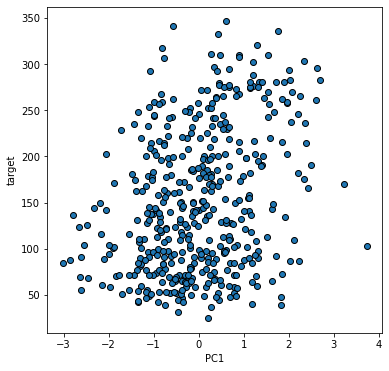

In [219]:
plt.figure(figsize = (6,6))
plt.scatter(Xs_pca_df[2], 
            X['target'],
            ec = 'k')
plt.xlabel('PC1')
plt.ylabel('target')
plt.show()

In [130]:
X['target'].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [142]:
who

LR	 PCA	 SS	 X	 X_arr	 X_scaled	 Xs_pca	 Xs_pca_df	 bmi	 
corr_matrix	 corr_target	 evr	 ld	 lin_reg	 np	 pca	 pd	 plt	 
r	 sns	 sort	 ss	 t	 t_df	 target	 y	 


In [144]:
Xs_pca_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.615965,1.813222,-0.117479,-0.721338,-0.260525,-0.837448,-0.414704,0.619824,0.808697,-0.186885,-0.057187
1,-3.043835,-1.240517,0.338740,-0.069984,-0.173213,-1.113711,0.142860,-0.190148,-0.085924,0.505603,0.044385
2,0.248064,1.434105,-0.123013,-1.302497,-1.179726,-1.002159,-0.627609,0.772186,0.491574,-0.028946,-0.059338
3,0.266169,-0.224615,-0.997119,2.310138,0.262971,0.382498,0.548609,-0.331955,-0.361259,-0.133385,-0.067915
4,-0.808769,-0.730612,0.187374,0.121187,-0.154054,-0.872924,0.319594,-1.074687,-0.132329,0.045074,-0.009800
...,...,...,...,...,...,...,...,...,...,...,...
437,1.307252,0.933698,0.267485,-1.156234,0.192360,-0.518451,0.313523,0.070882,0.243448,-0.379340,-0.027404
438,0.902953,-1.508616,-1.996112,-0.354713,-0.087255,0.929179,-0.907263,0.338417,-0.523779,-0.370800,0.033718
439,-0.284200,0.906628,-0.409330,-1.606865,-0.150986,-0.076873,-0.567032,-0.406631,-0.376097,-0.112041,0.060121
440,0.972649,0.126910,0.018955,1.964933,0.120637,-0.492872,0.390409,-0.005110,0.254933,-0.126559,-0.043993


In [164]:
bmi_pca = [i[2] for i in Xs_pca]
bmi_arr = np.array(bmi_pca)
bmi_arr.shape

t2 = [i[10] for i in X_arr]
t2_arr = np.array(t2)
t2_arr.shape

(442,)

In [161]:
X.iloc[11]

age        0.027178
sex        0.050680
bmi        0.017506
bp        -0.033213
s1        -0.007073
s2         0.045972
s3        -0.065491
s4         0.071210
s5        -0.096435
s6        -0.059067
target    69.000000
Name: 11, dtype: float64

In [166]:
lin_reg = LR()
lin_reg.fit(bmi_arr.reshape(-1, 1), t2_arr.reshape(-1, 1))

LinearRegression()

In [167]:
lin_reg.score(bmi_arr.reshape(-1, 1), t2_arr.reshape(-1, 1))

0.09649103401591608

In [169]:
# MSE
y_pred = lin_reg.predict(bmi_arr.reshape(-1, 1))
mse = np.mean((t2_arr.reshape(-1, 1)-y_pred)**2)
mse

5357.704171612136

In [170]:
rmse = np.sqrt(mse)
rmse

73.19633987852218

---
### Bonus question

In [194]:
data = pd.read_csv('Data/mysterious_data.csv', encoding = 'UTF8')
x = data['x']
y = data['y']
data.describe()

,x,y
count,142.000000,1.420000e+02
mean,54.263273,3.932260e+67
std,16.765142,3.285387e+68
min,22.307700,1.150940e+02
25%,44.102600,4.760582e+17
50%,53.333300,1.480859e+32
75%,64.743600,1.510847e+48
max,98.205100,3.455959e+69


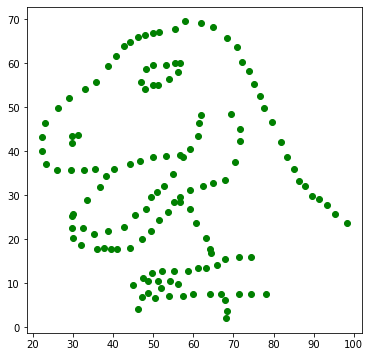

In [216]:
plt.figure(figsize=(6,6))
plt.scatter(x,np.log10(y), color = 'green')
plt.show()

In [223]:
lin_reg1 = LR()
lin_reg1.fit(X,y)

LinearRegression()

In [225]:
lin_reg1.score(X,y)

0.5177484222203498

In [230]:
y_pred = lin_reg1.predict(X)
mse = np.mean((y-y_pred)**2)
mse

2859.6963475867474